In [112]:
import numpy as np 
import pandas as pd 

## Types of Transformation:
1. Normalization and Standardization (StandardScaler)
2. Minimum - Maximum Scaling (MinMaxScaler)
3. Scaling to Median and quantiles (Robust Scaler)
4. Gaussian Transformation: converting the non-gaussian(non-normal) to gaussian distribution

    a. Logarithmic Transformation
    
    b. Reciprocal Transformation
    
    c. Square Root Transformation
    
    d. Exponential (or) Power Transformation
    
    e. Box-Cox Transformation
    
    f. Yeo-Johnson Transformation (future reference)

In [113]:
df = pd.read_csv('../input/titanic/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [114]:
#checking the null values and replacing with the median
df.isnull().sum()
df['Age'].fillna(df['Age'].median(),inplace=True)
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

## 1. StandardScaler
### most ML models go well with StandardScaler

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
st_sc_df = scaler.fit_transform(df)
st_sc_df = pd.DataFrame(st_sc_df)
st_sc_df.head()

,0,1,2
0,-0.789272,-0.565736,-0.502445
1,1.266990,0.663861,0.786845
2,1.266990,-0.258337,-0.488854
3,1.266990,0.433312,0.420730
4,-0.789272,0.433312,-0.486337


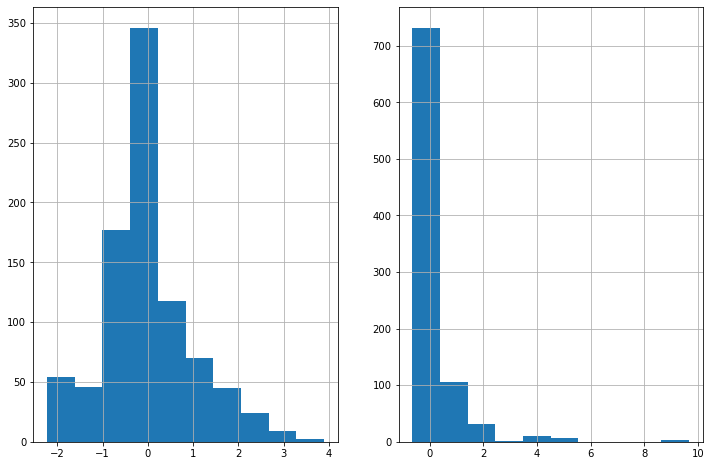

In [116]:
#plotting and checking the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
st_sc_df[1].hist()
plt.subplot(1,2,2)
st_sc_df[2].hist()

## 2. MinMaxScaler
### widely used in Deep Learning, CNN

In [117]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_df = min_max_scaler.fit_transform(df)
min_max_scaled_df = pd.DataFrame(min_max_scaled_df)
min_max_scaled_df.head()

,0,1,2
0,0.0,0.271174,0.014151
1,1.0,0.472229,0.139136
2,1.0,0.321438,0.015469
3,1.0,0.434531,0.103644
4,0.0,0.434531,0.015713


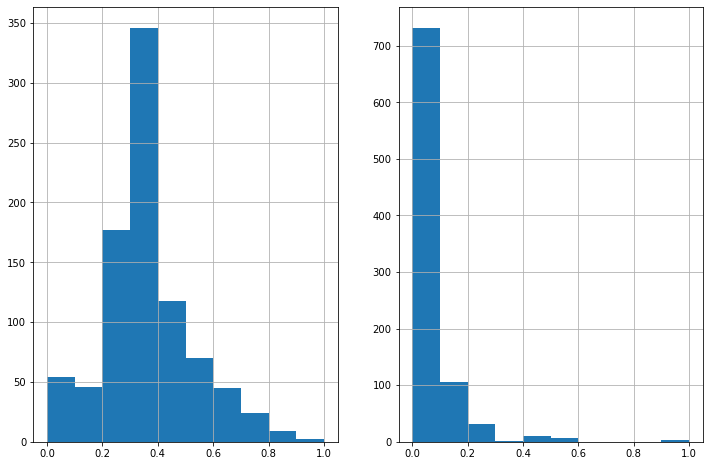

In [118]:
#plotting and checking the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
min_max_scaled_df[1].hist()
plt.subplot(1,2,2)
min_max_scaled_df[2].hist()

## 3. Robust Scaler
### its best to avoid the effect of outliers in the dataset.

In [119]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
rob_scaled_df = rob_scaler.fit_transform(df)
rob_scaled_df = pd.DataFrame(rob_scaled_df)
rob_scaled_df.head()

,0,1,2
0,0.0,-0.461538,-0.312011
1,1.0,0.769231,2.461242
2,1.0,-0.153846,-0.282777
3,1.0,0.538462,1.673732
4,0.0,0.538462,-0.277363


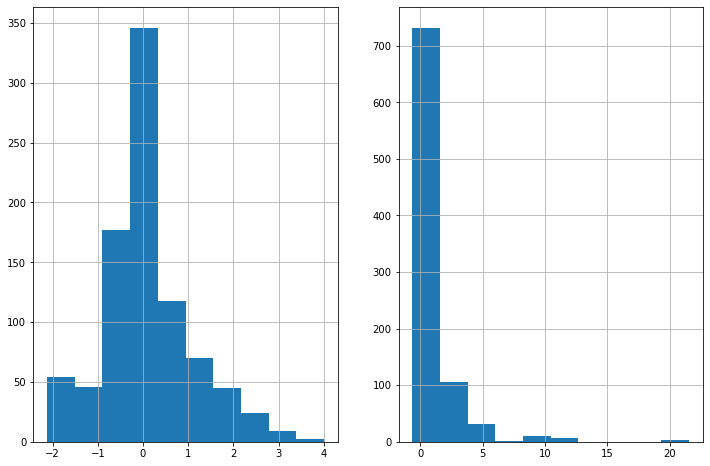

In [120]:
#plotting and checking the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
rob_scaled_df[1].hist()
plt.subplot(1,2,2)
rob_scaled_df[2].hist()

## 4. Gaussion Transformation

### 4.1. Logarthimic Transformation
#### can be used only for right-skewed distribution and for positive values.
#### log1p() can be used to avoid zeros in the data.

In [121]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [122]:
df['Age'] = df['Age'].fillna(df['Age'].median())

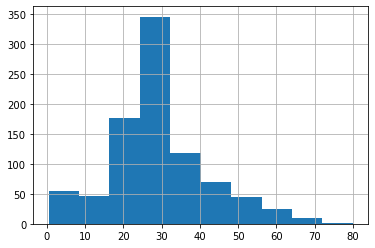

In [123]:
df['Age'].hist()

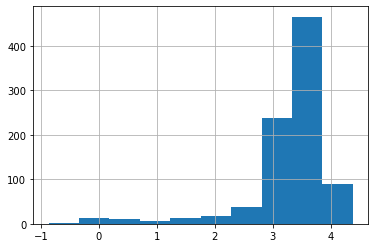

In [124]:
df['Age_log'] = np.log(df['Age'])
df['Age_log'].hist()

In [125]:
import scipy.stats as stat
import pylab

In [126]:
#function for Q-Q plotting to check the  distribution is Gaussian or Not.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

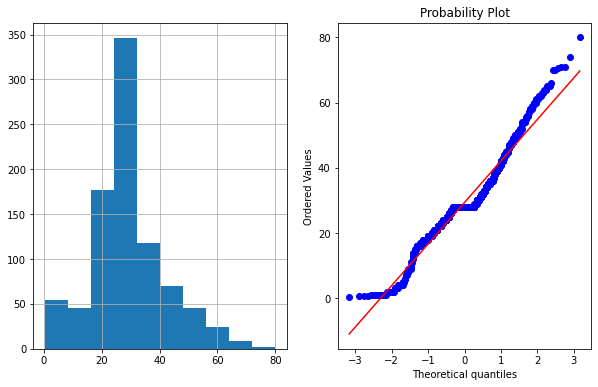

In [127]:
plot_data(df,'Age')

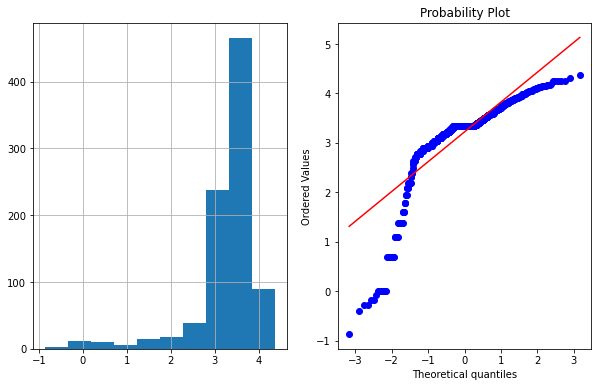

In [128]:
plot_data(df,'Age_log')

### 4.2. Reciprocal Transformation
#### The reciprocal transformation is a powerful transformation with a radical effect. The reciprocal reverses the order among values of the same sign, so large values become smaller. The negative reciprocal preserves the order among values of the same sign.

### Not Applicable for zeros

In [129]:
df['Age_recip'] = 1/df['Age']
df.head()

,Survived,Age,Fare,Age_log,Age_recip
0,0,22.0,7.2500,3.091042,0.045455
1,1,38.0,71.2833,3.637586,0.026316
2,1,26.0,7.9250,3.258097,0.038462
3,1,35.0,53.1000,3.555348,0.028571
4,0,35.0,8.0500,3.555348,0.028571


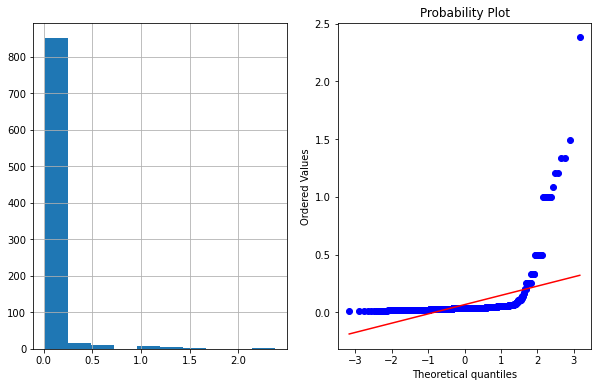

In [130]:
#checking with Q-Q plot
plot_data(df,'Age_recip')
#from the plot, it is not gaussian

### 4.3. SquareRoot Transformation    / can also try Cubic
#### also used for reducing right-skewed distributions and weaker than logarithmic distribution.
#### can be applied for zeros and positive numbers

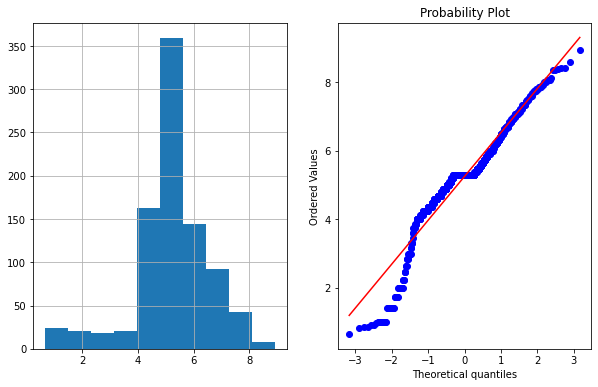

In [131]:
df['Age_sq_root'] = df['Age']**(1/2)
plot_data(df,'Age_sq_root')

### 4.4. Exponential (or) Power Transformation
#### generally, applied for left skewness and has reasonable effect on distribution
### can also x2,x3,exp(x)

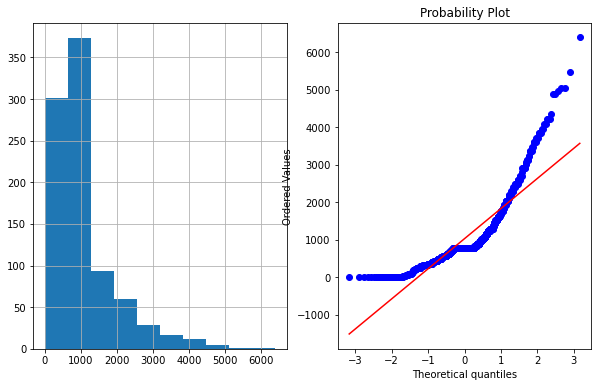

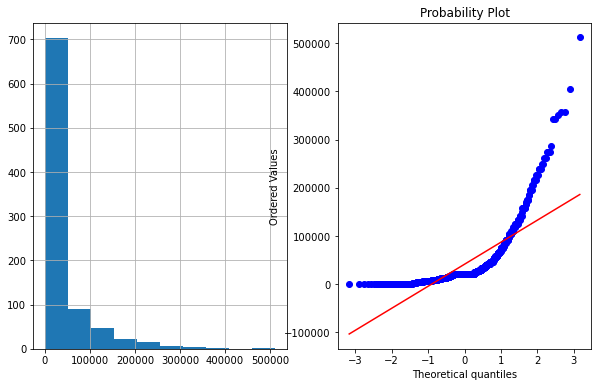

In [132]:
df['Age_2'] = df['Age']**2
df['Age_3'] = df['Age']**3
plot_data(df,'Age_2')
plot_data(df,'Age_3')

## 4.5. Box-Cox Transformation
### Box-Cox is an advanced version of exponential transformation.

### In this case, transformation searches through numerous values of lambda: -5 to +5. And, it chooses best value for lambda that fits the normal distribution of the variable.

## only for positive numbers


In [133]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [134]:
print(parameters)

0.7964531473656952


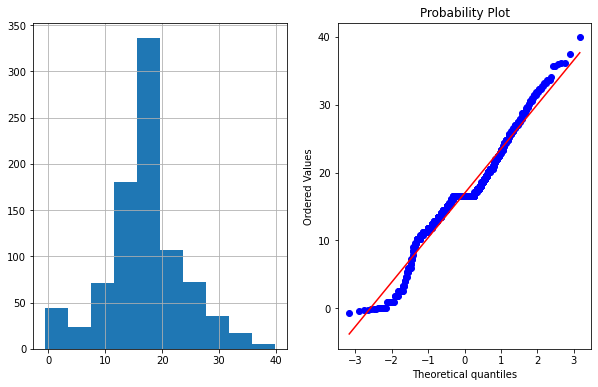

In [135]:
#applying the Q-Q plot
plot_data(df,'Age_Boxcox')